In [61]:
import math
import pandas as pd

In [62]:
companies_data_frame = pd.read_csv("./csv/companies.csv")
companies_data_frame

,stock_code,name_vn,name_en,name_short,post_to,C
0,A32,Công ty cổ phần 32,32 Joint Stock Company,A32,UPCOM,3
1,AAA,Công ty cổ phần Nhựa An Phát Xanh,An Phat Bioplastics Joint Stock Company,AAA,HOSE,1
2,AAM,Công ty Cổ phần Thủy sản Mekong,Mekong Fisheries Joint Stock Company,AAM,HOSE,1
3,AAS,Công ty cổ phần Chứng khoán SmartInvest,Smart Invest Securities Joint Stock Company,AAS,UPCOM,3
4,AAT,Công ty cổ phần Tập đoàn Tiên Sơn Thanh Hóa,Tien Son Thanh Hoa Joint Stock Company,AAT,HOSE,1
...,...,...,...,...,...,...
2284,XPH,CTCP Xà phòng Hà Nội,CTCP Xa phong Ha Noi,XPH Joint Stock Company,UPCOM,3
2285,YBC,CTCP Xi măng và Khoáng sản Yên Bái,Công ty CP Xi măng và khoáng sản Yên Bái,YBC Joint Stock Company,UPCOM,3
2286,YBM,Công ty cổ phần Khoáng sản Công nghiệp Yên Bái,Yen Bai Industry Mineral Joint Stock Company,YBM Joint Stock Company,HOSE,1
2287,YEG,Công ty cổ phần Tập đoàn Yeah1,Shares of Yeah1 Group Joint Stock Company,YEG Joint Stock Company,HOSE,1


In [63]:
stock = "SSI"

In [64]:
history_data_frame = pd.read_csv(f"./csv/history/{stock}.csv")
# Past
history_data_frame["price_three_days_ago"] = history_data_frame["close"].shift(3)
history_data_frame["price_three_days_ago_difference"] = round(history_data_frame["close"] - history_data_frame["price_three_days_ago"], 2)
history_data_frame["price_three_days_ago_return"] = round(history_data_frame["close"] / history_data_frame["price_three_days_ago_difference"], 2)
history_data_frame["price_two_days_ago"] = history_data_frame["close"].shift(2)
history_data_frame["price_yesterday"] = history_data_frame["close"].shift(1)
# Future
history_data_frame["price_tomorrow"] = history_data_frame["close"].shift(-1)
history_data_frame["price_tomorrow"] = history_data_frame["close"].shift(-1)
history_data_frame["price_tomorrow_difference"] = round(history_data_frame["price_tomorrow"] - history_data_frame["close"], 2)
history_data_frame["price_tomorrow_return"] = history_data_frame["price_tomorrow_difference"] / history_data_frame["close"]
# Direction
history_data_frame["direction"] = [1 if history_data_frame.loc[ei, "price_difference"] > 0 else -1 for ei in history_data_frame.index]
# Moving Average
history_data_frame["MA5"] = history_data_frame["close"].rolling(5).mean()
history_data_frame["MA10"] = history_data_frame["close"].rolling(10).mean()
history_data_frame["MA20"] = history_data_frame["close"].rolling(20).mean()
history_data_frame["MA50"] = history_data_frame["close"].rolling(50).mean()
history_data_frame["MA100"] = history_data_frame["close"].rolling(100).mean()
history_data_frame["MA200"] = history_data_frame["close"].rolling(200).mean()
# Save to File
history_data_frame.to_csv(f"./csv/history/{stock}.csv",index=False)
history_data_frame

,date,timestamp,open,high,low,close,volume,price_yesterday,price_tomorrow,price_difference,...,MA50,MA100,MA200,two_days_ago,price_two_days_ago,price_three_days_ago,price_tomorrow_difference,price_three_days_ago_difference,price_tomorrow_return,price_three_days_ago_return
0,2006-12-15,1166140800,15.579,15.579,15.579,15.579,293000,NaN,18.495,2.92,...,NaN,NaN,NaN,NaN,NaN,NaN,2.92,NaN,0.187432,NaN
1,2006-12-18,1166400000,17.505,18.783,17.505,18.495,340200,15.579,19.944,1.45,...,NaN,NaN,NaN,NaN,NaN,NaN,1.45,NaN,0.078400,NaN
2,2006-12-19,1166486400,18.278,19.944,18.278,19.944,326900,18.495,19.798,-0.15,...,NaN,NaN,NaN,15.579,15.579,NaN,-0.15,NaN,-0.007521,NaN
3,2006-12-20,1166572800,19.798,21.848,19.798,19.798,651600,19.944,19.000,-0.80,...,NaN,NaN,NaN,18.495,18.495,15.579,-0.80,4.22,-0.040408,4.69
4,2006-12-21,1166659200,19.000,20.248,19.000,19.000,200100,19.798,17.206,-1.79,...,NaN,NaN,NaN,19.944,19.944,18.495,-1.79,0.50,-0.094211,38.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,2023-11-10,1699574400,30.600,31.900,30.550,30.800,32350824,30.850,31.450,0.65,...,31.975,30.2710,25.511935,30.300,30.300,28.350,0.65,2.45,0.021104,12.57
4205,2023-11-13,1699833600,31.000,31.600,30.800,31.450,20870089,30.800,31.750,0.30,...,31.936,30.3245,25.568165,30.850,30.850,30.300,0.30,1.15,0.009539,27.35
4206,2023-11-14,1699920000,31.950,32.200,31.350,31.750,23245528,31.450,31.950,0.20,...,31.904,30.3820,25.623010,30.800,30.800,30.850,0.20,0.90,0.006299,35.28
4207,2023-11-15,1700006400,32.800,32.800,31.900,31.950,26914210,31.750,32.300,0.35,...,31.863,30.4435,25.685830,31.450,31.450,30.800,0.35,1.15,0.010955,27.78


In [65]:
history_data_frame.tail(10)

,date,timestamp,open,high,low,close,volume,price_yesterday,price_tomorrow,price_difference,...,MA50,MA100,MA200,two_days_ago,price_two_days_ago,price_three_days_ago,price_tomorrow_difference,price_three_days_ago_difference,price_tomorrow_return,price_three_days_ago_return
4199,2023-11-03,1698969600,29.00,29.05,28.30,28.90,25389922,28.90,29.00,0.10,...,32.239,30.04734,25.258495,27.15,27.15,25.75,0.10,3.15,0.003460,9.17
4200,2023-11-06,1699228800,29.15,29.30,28.80,29.00,17866096,28.90,28.35,-0.65,...,32.179,30.09009,25.310175,28.90,28.90,27.15,-0.65,1.85,-0.022414,15.68
4201,2023-11-07,1699315200,28.90,29.30,28.30,28.35,18334413,29.00,30.30,1.95,...,32.102,30.12249,25.353795,28.90,28.90,28.90,1.95,-0.55,0.068783,-51.55
4202,2023-11-08,1699401600,28.35,30.30,28.30,30.30,31637254,28.35,30.85,0.55,...,32.059,30.17150,25.406440,29.00,29.00,28.90,0.55,1.40,0.018152,21.64
4203,2023-11-09,1699488000,30.65,31.60,30.55,30.85,33989844,30.30,30.80,-0.05,...,32.029,30.22300,25.458710,28.35,28.35,29.00,-0.05,1.85,-0.001621,16.68
4204,2023-11-10,1699574400,30.60,31.90,30.55,30.80,32350824,30.85,31.45,0.65,...,31.975,30.27100,25.511935,30.30,30.30,28.35,0.65,2.45,0.021104,12.57
4205,2023-11-13,1699833600,31.00,31.60,30.80,31.45,20870089,30.80,31.75,0.30,...,31.936,30.32450,25.568165,30.85,30.85,30.30,0.30,1.15,0.009539,27.35
4206,2023-11-14,1699920000,31.95,32.20,31.35,31.75,23245528,31.45,31.95,0.20,...,31.904,30.38200,25.623010,30.80,30.80,30.85,0.20,0.90,0.006299,35.28
4207,2023-11-15,1700006400,32.80,32.80,31.90,31.95,26914210,31.75,32.30,0.35,...,31.863,30.44350,25.685830,31.45,31.45,30.80,0.35,1.15,0.010955,27.78
4208,2023-11-16,1700092800,31.90,32.30,31.35,32.30,19058368,31.95,NaN,NaN,...,31.836,30.50050,25.750400,31.75,31.75,31.45,NaN,0.85,NaN,38.00


<Axes: >

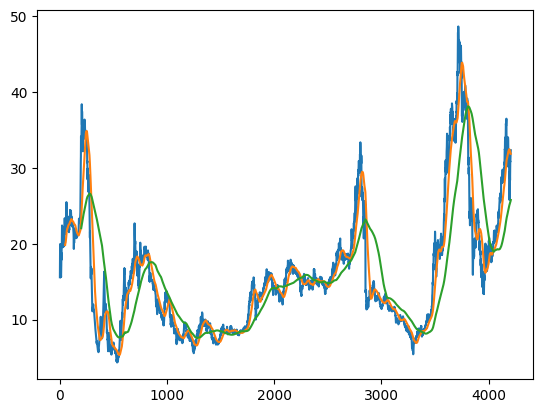

In [66]:
history_data_frame["close"].plot()
history_data_frame["MA50"].plot()
history_data_frame["MA200"].plot()